<a href="https://colab.research.google.com/github/Bonjiang/datasci_6_anova/blob/main/507_Week_6_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

## Variables of interest

#### dv = time_in_hospital, iv1 = race, iv2 = A1Cresult

In [ ]:
# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

In [61]:
df = pd.DataFrame(X)
df

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [18]:
variables_of_interest = df[['time_in_hospital', 'race', 'A1Cresult']]

In [19]:
variables_of_interest.to_csv('diabetesdata.csv', index=False)

In [ ]:
print(df.dtypes)

In [40]:
df['race'] = df['race'].astype(str)
df['A1Cresult'] = df['A1Cresult'].astype(str)

#### I created a new subset of the data that only included my variables of interest which were 'time_in_hospital', 'race', and 'A1Cresult'. This subset focused on the variables of interest and these variables were chosen because the were related to the research question of 'How do the race of the patient (race) and their A1C test results (A1Cresult) jointly influence the duration of their hospital stay (time_in_hospital)? I also ensured that the independent variables were strings as they were categorical values

## Assumption Checks- Normality: Shapiro-Wilk Test

In [25]:
print('Main DV: ', stats.shapiro(df['time_in_hospital']))

Main DV:  ShapiroResult(statistic=0.8869192600250244, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### The Shapiro-Wilk test is used to determine whether a dataset follows a normal distribution. Given these results, the statistic value suggests that my data is not far from a normal distribution, but may have some deviations as it's close to 1. However, the p-value associated is shown as 0.0 which indicates that the data significantly far from the normality. Note: The p-value is a stronger indication than the statistic value

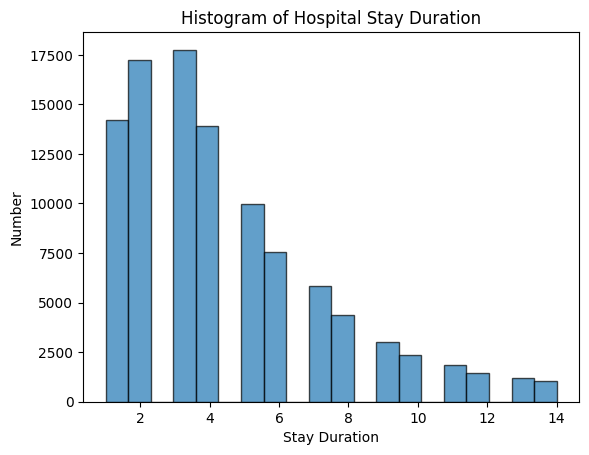

In [26]:
plt.hist(df['time_in_hospital'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Hospital Stay Duration')
plt.xlabel('Stay Duration')
plt.ylabel('Number')
plt.show()

#### This is a right-skewed distribution and means there are more responses to the right-hand side of the mean. This shows that the data is far from normal distribution as a normal distribution would show symmetrical distribution around the mean.

In [28]:
groups = df.groupby(['race', 'A1Cresult'])

for (race_status, A1Cresult_status), group_df in groups:
    _, p_value = stats.shapiro(group_df['time_in_hospital'])

    print(f"Group ({race_status}, {A1Cresult_status}):")
    print(f"P-value from Shapiro-Wilk Test: {p_value}\n")


Group (AfricanAmerican, >7):
P-value from Shapiro-Wilk Test: 1.8906119489850806e-16

Group (AfricanAmerican, >8):
P-value from Shapiro-Wilk Test: 6.7359146155303186e-34

Group (AfricanAmerican, None):
P-value from Shapiro-Wilk Test: 0.0

Group (AfricanAmerican, Norm):
P-value from Shapiro-Wilk Test: 2.9696700824519264e-25

Group (Asian, >7):
P-value from Shapiro-Wilk Test: 0.0023467366117984056

Group (Asian, >8):
P-value from Shapiro-Wilk Test: 2.233798113593366e-05

Group (Asian, None):
P-value from Shapiro-Wilk Test: 2.6558121925662052e-21

Group (Asian, Norm):
P-value from Shapiro-Wilk Test: 0.0007482930086553097

Group (Caucasian, >7):
P-value from Shapiro-Wilk Test: 1.7925673399754353e-38

Group (Caucasian, >8):
P-value from Shapiro-Wilk Test: 0.0

Group (Caucasian, None):
P-value from Shapiro-Wilk Test: 0.0

Group (Caucasian, Norm):
P-value from Shapiro-Wilk Test: 1.930148504761003e-41

Group (Hispanic, >7):
P-value from Shapiro-Wilk Test: 2.1721559733123286e-06

Group (Hispanic

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### These are the p-values from Shapiro-Wilk tests for different groups in my dataset. The p-values shown are very small and are close to zero which indicates that most of the groups in my data do not follow normal distribution.

## Assumption Checks- Homoscedasticity (Equal Variances): Levene's Test

In [41]:
stats.levene(
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['A1Cresult'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['A1Cresult'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['A1Cresult'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Other'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'Other'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'Other'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Other'][df['A1Cresult'] == 'Norm'],
)



LeveneResult(statistic=6.716864467722241, pvalue=4.185867568134629e-18)

#### These results of a low p-value indicates that there is strong evidence against the null hypothesis. This value suggests that the variances in the compared groups are not equal and that there are significant differences in the data being dispersed among the groups.

## ANOVA

In [31]:
model = ols('time_in_hospital ~ C(race) * C(A1Cresult)', data=df).fit()

In [32]:
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                             sum_sq       df           F        PR(>F)
C(race)                  641.735130      4.0   18.075566  7.501203e-15
C(A1Cresult)            3895.231358      3.0  146.287793  1.363867e-94
C(race):C(A1Cresult)     276.823623     12.0    2.599070  1.845652e-03
Residual              882895.150091  99473.0         NaN           NaN


#### These results indicate that both the variables of 'race' and 'A1Cresult' have significant effects on the outcome/dependent variable of 'time_in_hospital' and that there is a significant interaction effect between the independent variables. The p-values are very close to zero, indicatintg strong statistical significance. From this, a Tukey post-hoc test is necessary.

## Post-hoc Test

In [42]:
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
group_order = ['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other']

mc = MultiComparison(df['time_in_hospital'], df['race'], group_order)

In [57]:
result = mc.tukeyhsd()
print(result)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
     group1       group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
AfricanAmerican     Asian  -0.5125 0.0002 -0.8396 -0.1855   True
AfricanAmerican Caucasian  -0.1221    0.0 -0.1879 -0.0564   True
AfricanAmerican  Hispanic   -0.448    0.0 -0.6378 -0.2582   True
AfricanAmerican     Other  -0.2343 0.0278 -0.4523 -0.0163   True
          Asian Caucasian   0.3904 0.0087  0.0673  0.7135   True
          Asian  Hispanic   0.0646 0.9894 -0.3043  0.4335  False
          Asian     Other   0.2783 0.2778 -0.1059  0.6624  False
      Caucasian  Hispanic  -0.3258    0.0 -0.5087  -0.143   True
      Caucasian     Other  -0.1121 0.5995 -0.3241  0.0998  False
       Hispanic     Other   0.2137 0.2175 -0.0631  0.4905  False
----------------------------------------------------------------


#### For each pair of groups, the 'reject' column suggests if there is a statistically significant difference in means between those two groups. If 'True' it indiciates that the difference in means is statistically significant and can conclude that the means are different from one another. However, if 'False', then there is no statistically significant difference in means between the groups. Here, groups with significant differences include: AfricanAmerican & Asian, AfricanAmerican & Caucasian, AfricanAmerican & Hispanic, AfricanAmerican & Other, Asian & Caucasian, Caucasian & Hispanic.

In [63]:
group_order = ['>7','>8', 'None', 'Norm']

mc = MultiComparison(df['time_in_hospital'], df['A1Cresult'], group_order)

In [59]:
result = mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    >7     >8    -0.14 0.0773   -0.29  0.0099  False
    >7   None  -0.5808    0.0 -0.7075 -0.4541   True
    >7   Norm   0.0348 0.9486 -0.1299  0.1994  False
    >8   None  -0.4408    0.0 -0.5292 -0.3524   True
    >8   Norm   0.1748 0.0059  0.0374  0.3121   True
  None   Norm   0.6156    0.0  0.5041  0.7271   True
----------------------------------------------------


#### Here, groups with significant differences include >7 & None, >8 & None, >8 & Norm, None & Norm as the reject column says 'True' and the means of those two groups are different from each other.